# Title
London House Price Prediction Using Machine Learning

# Objective:
The primary objective of this model is to predict house prices in London city based on various influential factors and real estate investors make data-driven decisions.

# Problem Statement:
The London real estate market is highly dynamic, influenced by various factors such as location, property size, economic conditions, and neighborhood. investors and stakeholders struggle to accurately estimate house prices.

In [1]:
# import some packages which help us in manipulation and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\Abhay\Downloads\london_houses.csv")

In [3]:
df.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [4]:
df.isna().sum()

Address            0
Neighborhood       0
Bedrooms           0
Bathrooms          0
Square Meters      0
Building Age       0
Garden             0
Garage             0
Floors             0
Property Type      0
Heating Type       0
Balcony            0
Interior Style     0
View               0
Materials          0
Building Status    0
Price (£)          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          1000 non-null   object
 1   Neighborhood     1000 non-null   object
 2   Bedrooms         1000 non-null   int64 
 3   Bathrooms        1000 non-null   int64 
 4   Square Meters    1000 non-null   int64 
 5   Building Age     1000 non-null   int64 
 6   Garden           1000 non-null   object
 7   Garage           1000 non-null   object
 8   Floors           1000 non-null   int64 
 9   Property Type    1000 non-null   object
 10  Heating Type     1000 non-null   object
 11  Balcony          1000 non-null   object
 12  Interior Style   1000 non-null   object
 13  View             1000 non-null   object
 14  Materials        1000 non-null   object
 15  Building Status  1000 non-null   object
 16  Price (£)        1000 non-null   int64 
dtypes: int64(6), object(11)
memory usa

In [6]:
obj=df.select_dtypes(include=['object']).columns
obj

Index(['Address', 'Neighborhood', 'Garden', 'Garage', 'Property Type',
       'Heating Type', 'Balcony', 'Interior Style', 'View', 'Materials',
       'Building Status'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder 

In [8]:
le=LabelEncoder()

In [9]:
for i in  obj:
    df[i]=le.fit_transform(df[i])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Address          1000 non-null   int64
 1   Neighborhood     1000 non-null   int64
 2   Bedrooms         1000 non-null   int64
 3   Bathrooms        1000 non-null   int64
 4   Square Meters    1000 non-null   int64
 5   Building Age     1000 non-null   int64
 6   Garden           1000 non-null   int64
 7   Garage           1000 non-null   int64
 8   Floors           1000 non-null   int64
 9   Property Type    1000 non-null   int64
 10  Heating Type     1000 non-null   int64
 11  Balcony          1000 non-null   int64
 12  Interior Style   1000 non-null   int64
 13  View             1000 non-null   int64
 14  Materials        1000 non-null   int64
 15  Building Status  1000 non-null   int64
 16  Price (£)        1000 non-null   int64
dtypes: int64(17)
memory usage: 132.9 KB


In [11]:
df.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,678,6,2,3,179,72,0,0,3,2,1,0,1,1,2,2,2291200
1,422,9,2,1,123,34,1,0,1,0,0,0,1,0,1,1,1476000
2,344,8,5,3,168,38,0,1,3,2,0,2,1,4,3,2,1881600
3,517,3,5,1,237,53,1,1,1,0,3,2,0,2,0,2,1896000
4,77,5,4,1,127,23,0,1,2,2,0,2,3,2,3,1,1524000


In [12]:
# find is there a corelation between features and price
df.corr()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
Address,1.000000,0.040401,-0.019530,0.036273,-0.043400,-0.038551,0.016064,0.005749,-0.015581,-0.043607,-0.033514,0.040583,0.025555,-0.008217,-0.008659,0.005575,-0.037208
Neighborhood,0.040401,1.000000,0.000293,0.049824,0.002484,0.020747,0.013427,0.030938,-0.012378,-0.032031,0.013181,-0.060038,-0.029153,0.018421,0.046652,0.028236,0.057700
Bedrooms,-0.019530,0.000293,1.000000,-0.030236,-0.020413,-0.033883,-0.019610,-0.003608,-0.026984,-0.001342,0.006162,0.017424,-0.019145,-0.006057,0.020592,-0.073605,-0.016679
Bathrooms,0.036273,0.049824,-0.030236,1.000000,-0.032733,-0.026529,-0.018657,-0.016095,0.037699,-0.018606,0.019687,-0.030257,-0.022457,0.053422,0.017059,-0.033229,-0.032632
Square Meters,-0.043400,0.002484,-0.020413,-0.032733,1.000000,0.008557,-0.037442,0.025122,0.023822,-0.000502,-0.012460,0.001333,0.069136,-0.001505,-0.000279,0.024482,0.790652
Building Age,-0.038551,0.020747,-0.033883,-0.026529,0.008557,1.000000,0.032079,-0.018754,-0.042743,0.017140,-0.038275,-0.003012,0.008431,-0.020772,-0.001055,-0.005735,0.031522
Garden,0.016064,0.013427,-0.019610,-0.018657,-0.037442,0.032079,1.000000,0.001953,-0.037482,-0.017297,0.028104,0.049806,-0.078386,-0.009721,0.031477,0.044854,-0.008594
Garage,0.005749,0.030938,-0.003608,-0.016095,0.025122,-0.018754,0.001953,1.000000,-0.037712,0.035888,-0.012747,0.006082,0.041054,-0.040223,-0.008125,0.045083,0.046790
Floors,-0.015581,-0.012378,-0.026984,0.037699,0.023822,-0.042743,-0.037482,-0.037712,1.000000,0.014124,-0.053664,0.041730,0.021809,0.014716,-0.016544,-0.016202,0.015625
Property Type,-0.043607,-0.032031,-0.001342,-0.018606,-0.000502,0.017140,-0.017297,0.035888,0.014124,1.000000,0.018408,0.013102,-0.008647,-0.009115,0.022333,0.004007,0.147941


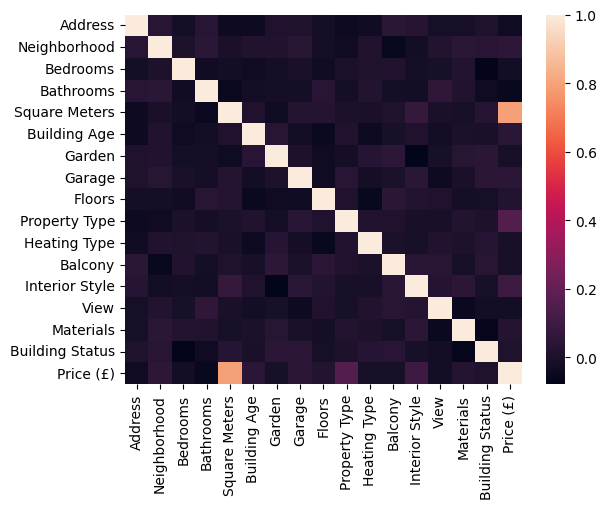

In [47]:
sns.heatmap(df.corr())
plt.show()

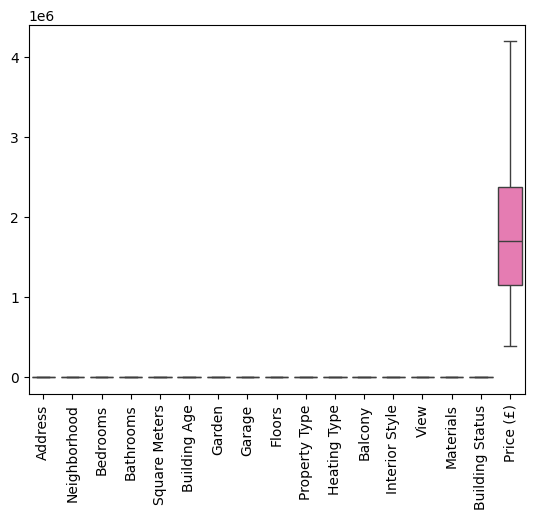

In [44]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [15]:
# IQR (Interquartile Range for remove outliers)
q1=df['Price (£)'].quantile(0.25)
q3=df['Price (£)'].quantile(0.75)
iqr=q3-q1
q1,iqr,q3

(np.float64(1161400.0), np.float64(1229100.0), np.float64(2390500.0))

In [16]:
upper_limit=q3 + (1.5 * iqr)
lower_limit=q1 - (1.5 * iqr)
df.loc[(df['Price (£)']> upper_limit) | (df['Price (£)']< lower_limit)]

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
86,673,1,5,2,249,3,1,0,2,1,0,0,2,3,3,2,4980000
333,7,1,4,3,214,21,1,1,2,1,3,0,3,0,1,2,4280000
406,255,1,4,1,225,30,1,1,1,1,1,2,0,4,3,0,4500000
497,188,9,2,3,249,14,0,0,2,1,1,0,1,0,2,0,4482000
528,168,4,1,3,226,61,0,1,1,1,1,1,2,2,1,2,4294000
568,472,9,1,3,249,9,1,0,1,1,0,0,2,1,3,1,4482000
602,217,4,5,2,233,72,0,1,2,1,1,2,2,3,2,1,4427000
715,507,9,2,3,243,90,0,1,3,1,2,0,1,4,3,1,4374000
947,573,9,5,3,241,75,1,1,2,1,2,1,0,1,1,0,4338000
980,443,9,5,3,240,71,0,0,3,1,0,0,2,3,3,0,4320000


In [17]:
df=df.loc[(df['Price (£)']< upper_limit) & (df['Price (£)'] > lower_limit)]
print(len(df))

990


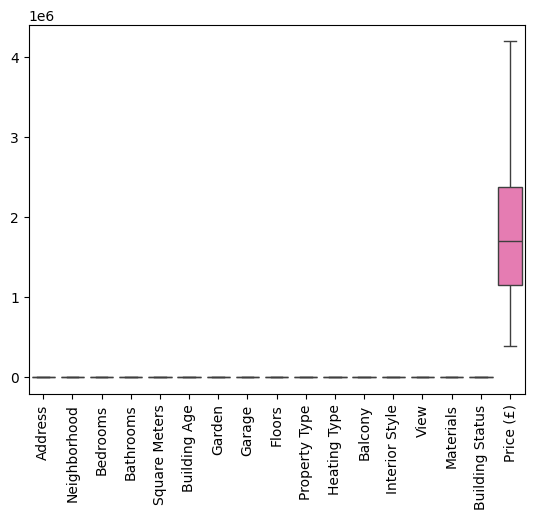

In [43]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [19]:
# vertical spliting for seprate Features and Target
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [20]:
x.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status
0,678,6,2,3,179,72,0,0,3,2,1,0,1,1,2,2
1,422,9,2,1,123,34,1,0,1,0,0,0,1,0,1,1
2,344,8,5,3,168,38,0,1,3,2,0,2,1,4,3,2
3,517,3,5,1,237,53,1,1,1,0,3,2,0,2,0,2
4,77,5,4,1,127,23,0,1,2,2,0,2,3,2,3,1


In [22]:
# from sklearn.preprocessing import StandardScaler
# ss=StandardScaler()
# x=pd.DataFrame(ss.fit_transform(x), columns=x.columns)

In [24]:
from sklearn.model_selection import train_test_split

# Horizontaal spliting (70% traing data), (30% testing data)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# LinearRegression

In [26]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
lr.score(x_train, y_train)*100, lr.score(x_test, y_test)*100

(65.91773675066518, 64.61456912362807)

# Regularization:
1. Ridge (L2)
2. Lasso (L1)

In [28]:
l2=Ridge(10)
l2.fit(x_train, y_train)

Ridge(alpha=10)

In [29]:
for i in range(20,30):
    l2=Ridge(i)
    l2.fit(x_train, y_train)
    sc=l2.score(x_train, y_train)
    print(sc)

0.6591309005785019
0.6591263869965707
0.6591216873652692
0.6591168044618503
0.6591117410174534
0.6591064997181149
0.6591010832057485
0.6590954940790991
0.659089734894666
0.6590838081676033


In [30]:
l1=Lasso(20)
l1.fit(x_train, y_train)

Lasso(alpha=20)

In [31]:
for i in range(20,30):
    l1=Lasso(i)
    l1.fit(x_train, y_train)
    sc=l1.score(x_train, y_train)
    print(sc)

0.6591773565673205
0.6591773554460352
0.6591773542700531
0.6591773530393739
0.6591773517539976
0.6591773504139244
0.6591773490191541
0.6591773475696869
0.6591773460655226
0.6591773445066613


# DecisionTree

In [32]:
dt=DecisionTreeRegressor(max_depth=10)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [33]:
dt.score(x_train, y_train)*100, dt.score(x_test, y_test)*100

(99.74999163171864, 81.787390585368)

# RandomForest

In [34]:
rf=RandomForestRegressor(min_samples_leaf=4, random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=4, random_state=42)

In [35]:
rf.score(x_train, y_train)*100,  rf.score(x_test, y_test)*100

(95.22990775102753, 86.89722346052667)

# KNN

In [36]:
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [37]:
knn.score(x_train, y_train)*100,  knn.score(x_test, y_test)*100

(69.97176332503723, 54.15460503553457)

# GradientBoosting

In [38]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [39]:
gb.score(x_train, y_train)*100,  gb.score(x_test, y_test)*100

(98.72988252305936, 97.38850357652831)

# Analysis: 
GradientBoostingRegressor is giving best result without Overfitting.